In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report,confusion_matrix,roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
import shap
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [2]:
df=pd.read_csv("D:/dataset/Subscription_Service_Churn_Dataset.csv")
df.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0
5,71,NaN,818.287054,Premium,Credit card,No,Movies,Yes,Computer,7.310172,...,30,Comedy,2.779614,6,Female,16,Yes,NaN,5E4TQK5OVX,0
6,69,17.145910,1183.067820,Basic,NaN,No,Movies,Yes,Mobile,19.008900,...,35,Sci-Fi,4.933494,6,Female,5,No,Yes,8VFNZ1M1I9,1
7,76,17.461875,1327.102526,Premium,Electronic check,No,Movies,Yes,Mobile,24.429413,...,32,Fantasy,2.154737,9,Female,11,Yes,Yes,THKWUHOGUL,0
8,8,NaN,NaN,Premium,Electronic check,No,Both,Yes,Computer,15.488913,...,16,Fantasy,NaN,3,Female,2,No,Yes,IGZ39O1ROC,0
9,26,19.699262,512.180802,Premium,Credit card,Yes,Both,Yes,NaN,2.121762,...,44,Drama,1.725700,4,Male,16,Yes,NaN,JHTQYVGRR4,1


In [3]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [4]:
churn_counts=df['Churn'].value_counts()


In [5]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate


Churn
0    82.450675
1    17.549325
Name: proportion, dtype: float64

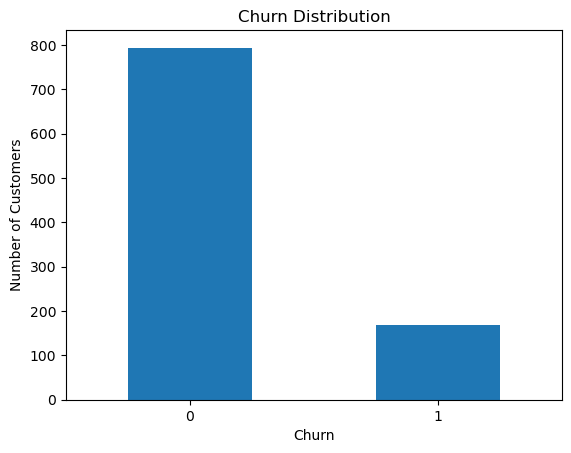

In [6]:
import matplotlib.pyplot as plt

churn_counts.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


In [7]:
print(f"Total customers: {len(df)}")
print(f"Churned customers: {churn_counts.get(1, churn_counts.get('Yes'))}")
print(f"Churn rate (%):\n{churn_rate}")


Total customers: 963
Churned customers: 169
Churn rate (%):
Churn
0    82.450675
1    17.549325
Name: proportion, dtype: float64


In [8]:
numeric_features = [
    'AccountAge',
    'MonthlyCharges',
    'ViewingHoursPerWeek',
    'SupportTicketsPerMonth',
    'WatchlistSize',
    'UserRating'
]


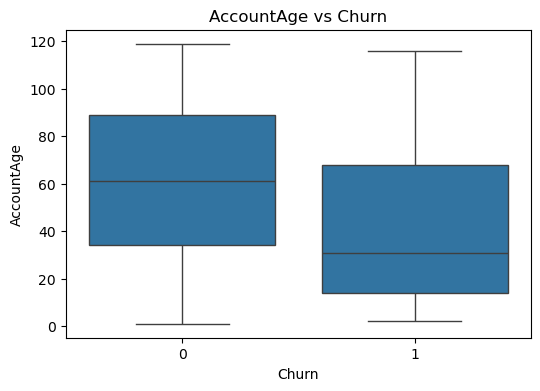

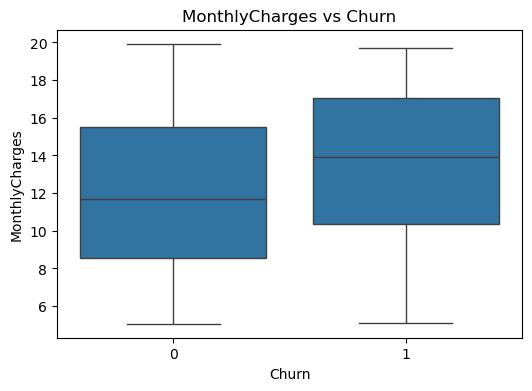

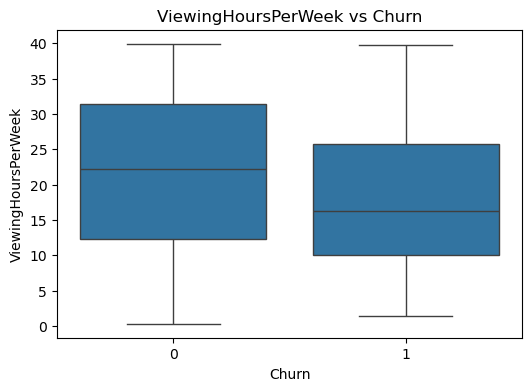

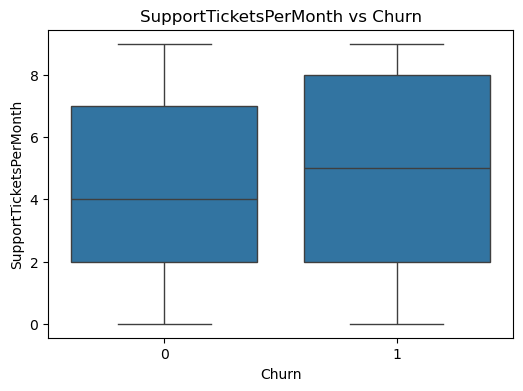

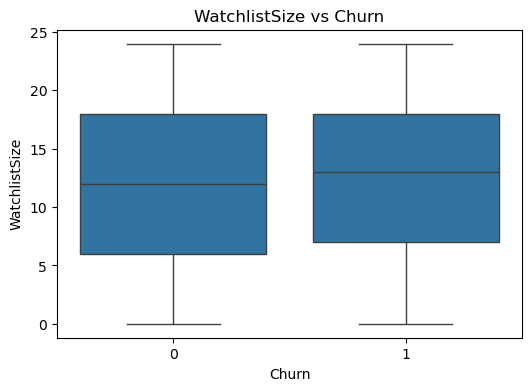

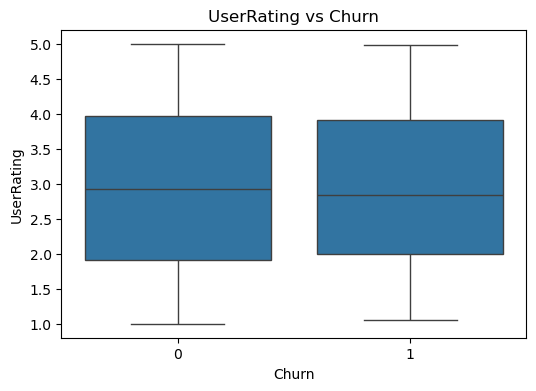

In [9]:
for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} vs Churn')
    plt.show()


In [10]:
df.groupby('Churn')[numeric_features].mean()


,AccountAge,MonthlyCharges,ViewingHoursPerWeek,SupportTicketsPerMonth,WatchlistSize,UserRating
Churn,,,,,,
0,60.909320,12.062798,21.688329,4.328715,11.790932,2.922676
1,41.568047,13.512346,17.932697,5.053254,12.414201,2.930423


In [11]:
df['LowViewing'] = df['ViewingHoursPerWeek'] < df['ViewingHoursPerWeek'].median()

df.groupby('LowViewing')['Churn'].mean() * 100


LowViewing
False    14.107884
True     20.997921
Name: Churn, dtype: float64

In [12]:
def churn_rate_by_category(df, feature):
    summary = (
        df.groupby(feature)['Churn']
        .agg(['count', 'mean'])
        .reset_index()
    )
    summary['churn_rate_percent'] = summary['mean'] * 100
    return summary.sort_values('churn_rate_percent', ascending=False)


In [13]:
categorical_features = [
    'SubscriptionType',
    'PaymentMethod',
    'ContentType',
    'MultiDeviceAccess',
    'ParentalControl',
    'SubtitlesEnabled',
    'PaperlessBilling',
    'Gender'
]


In [14]:
for feature in categorical_features:
    print(f"\nChurn Rate by {feature}")
    display(churn_rate_by_category(df, feature))



Churn Rate by SubscriptionType


,SubscriptionType,count,mean,churn_rate_percent
0,Basic,293,0.187713,18.771331
1,Premium,333,0.168168,16.816817
2,Standard,287,0.163763,16.376307



Churn Rate by PaymentMethod


,PaymentMethod,count,mean,churn_rate_percent
3,Mailed check,67,0.268657,26.865672
0,Bank transfer,214,0.168224,16.822430
2,Electronic check,214,0.168224,16.822430
1,Credit card,245,0.151020,15.102041



Churn Rate by ContentType


,ContentType,count,mean,churn_rate_percent
1,Movies,303,0.201320,20.132013
2,TV Shows,311,0.176849,17.684887
0,Both,349,0.151862,15.186246



Churn Rate by MultiDeviceAccess


,MultiDeviceAccess,count,mean,churn_rate_percent
1,Yes,466,0.186695,18.669528
0,No,497,0.164990,16.498994



Churn Rate by ParentalControl


,ParentalControl,count,mean,churn_rate_percent
0,No,563,0.17762,17.761989
1,Yes,400,0.17250,17.250000



Churn Rate by SubtitlesEnabled


,SubtitlesEnabled,count,mean,churn_rate_percent
0,No,80,0.250000,25.000000
1,Yes,83,0.228916,22.891566



Churn Rate by PaperlessBilling


,PaperlessBilling,count,mean,churn_rate_percent
1,Yes,457,0.179431,17.943107
0,No,506,0.171937,17.193676



Churn Rate by Gender


,Gender,count,mean,churn_rate_percent
1,Male,541,0.179298,17.929760
0,Female,382,0.175393,17.539267


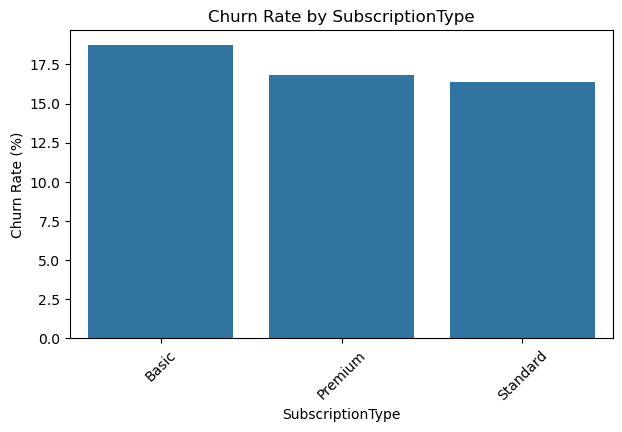

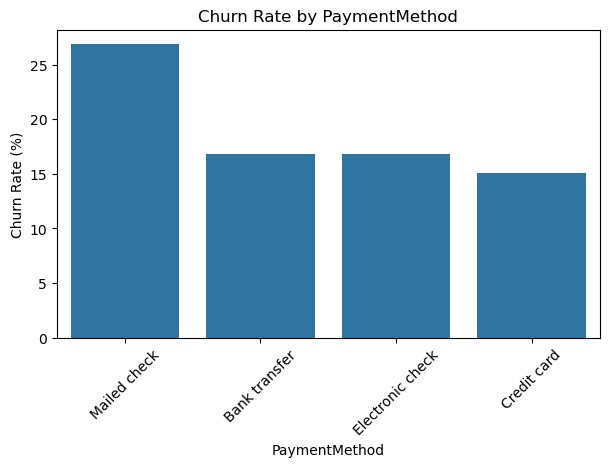

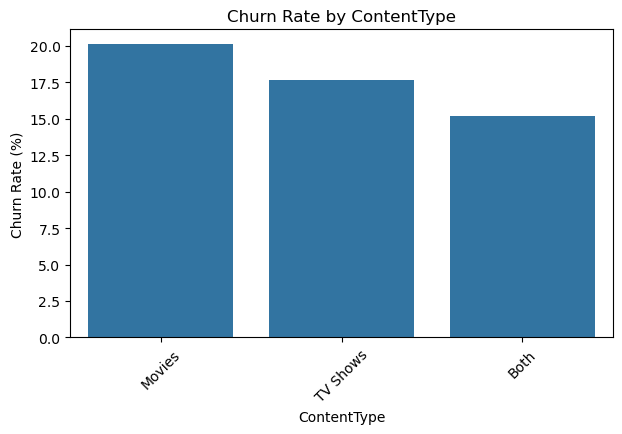

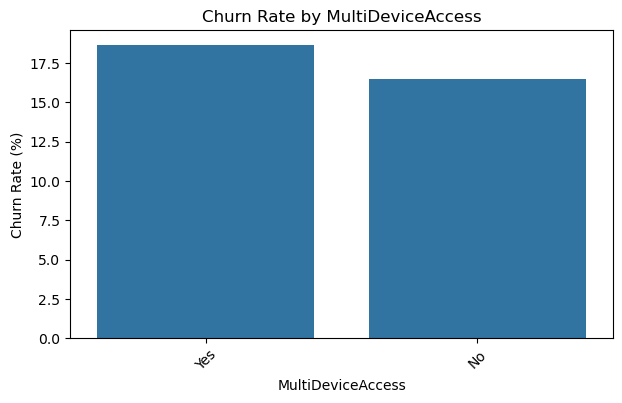

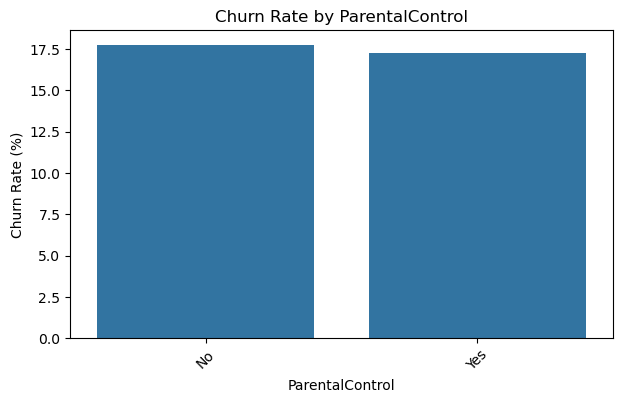

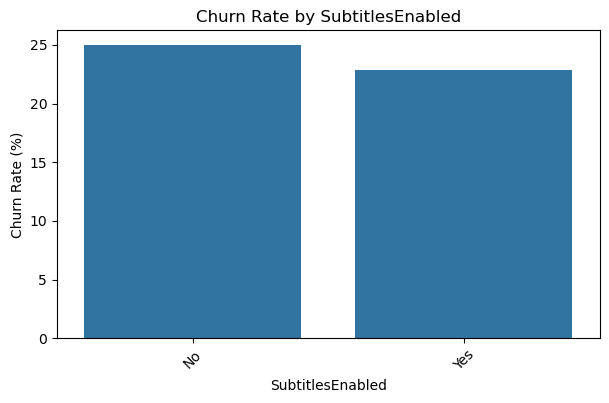

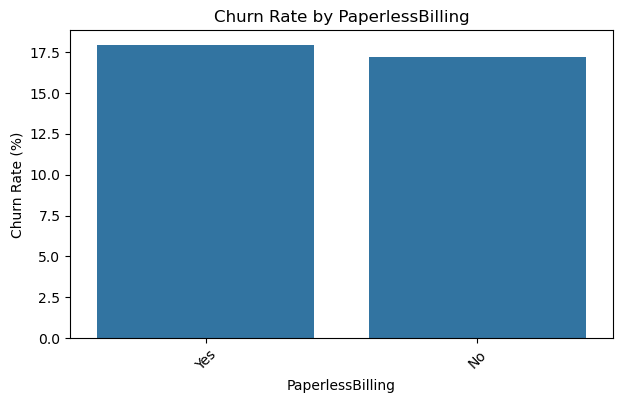

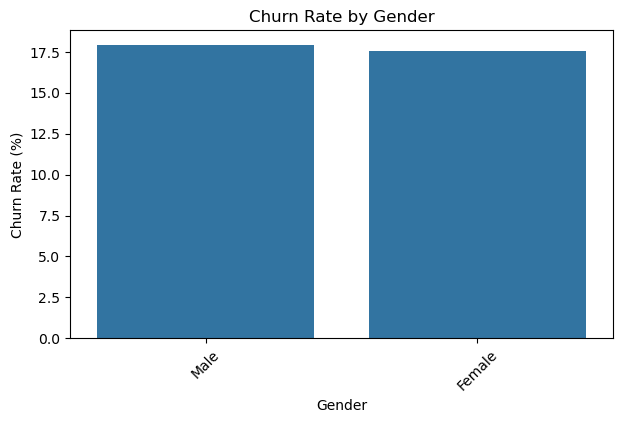

In [15]:
for feature in categorical_features:
    summary = churn_rate_by_category(df, feature)
    
    plt.figure(figsize=(7,4))
    sns.barplot(
        data=summary,
        x=feature,
        y='churn_rate_percent'
    )
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45)
    plt.show()


In [16]:
df['SubscriptionType'].value_counts()


SubscriptionType
Premium     333
Basic       293
Standard    287
Name: count, dtype: int64

In [17]:
df['ViewingLevel'] = pd.qcut(
    df['ViewingHoursPerWeek'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [18]:
interaction_1 = (
    df.groupby(['ViewingLevel', 'SubscriptionType'])['Churn']
    .mean()
    .reset_index()
)

interaction_1['churn_rate_percent'] = interaction_1['Churn'] * 100
interaction_1


C:\Users\pavithra sekar\AppData\Local\Temp\ipykernel_8016\306057380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ViewingLevel', 'SubscriptionType'])['Churn']


,ViewingLevel,SubscriptionType,Churn,churn_rate_percent
0,Low,Basic,0.217822,21.782178
1,Low,Premium,0.247863,24.786325
2,Low,Standard,0.230769,23.076923
3,Medium,Basic,0.200000,20.000000
4,Medium,Premium,0.155963,15.596330
5,Medium,Standard,0.178218,17.821782
6,High,Basic,0.144330,14.432990
7,High,Premium,0.093458,9.345794
8,High,Standard,0.084211,8.421053


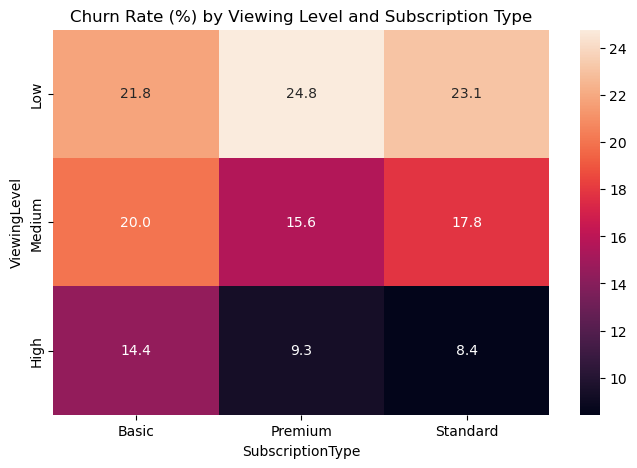

In [19]:
pivot_1 = interaction_1.pivot(
    index='ViewingLevel',
    columns='SubscriptionType',
    values='churn_rate_percent'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_1, annot=True, fmt=".1f")
plt.title('Churn Rate (%) by Viewing Level and Subscription Type')
plt.show()


In [20]:
df['AccountAgeGroup'] = pd.qcut(
    df['AccountAge'],
    q=3,
    labels=['New', 'Mid', 'Old']
)


In [21]:
interaction_2 = (
    df.groupby(['AccountAgeGroup', 'SubscriptionType'])['Churn']
    .mean()
    .reset_index()
)

interaction_2['churn_rate_percent'] = interaction_2['Churn'] * 100
interaction_2


C:\Users\pavithra sekar\AppData\Local\Temp\ipykernel_8016\1938853340.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AccountAgeGroup', 'SubscriptionType'])['Churn']


,AccountAgeGroup,SubscriptionType,Churn,churn_rate_percent
0,New,Basic,0.288889,28.888889
1,New,Premium,0.286957,28.695652
2,New,Standard,0.282828,28.282828
3,Mid,Basic,0.141509,14.150943
4,Mid,Premium,0.129310,12.931034
5,Mid,Standard,0.107527,10.752688
6,Old,Basic,0.144330,14.432990
7,Old,Premium,0.078431,7.843137
8,Old,Standard,0.094737,9.473684


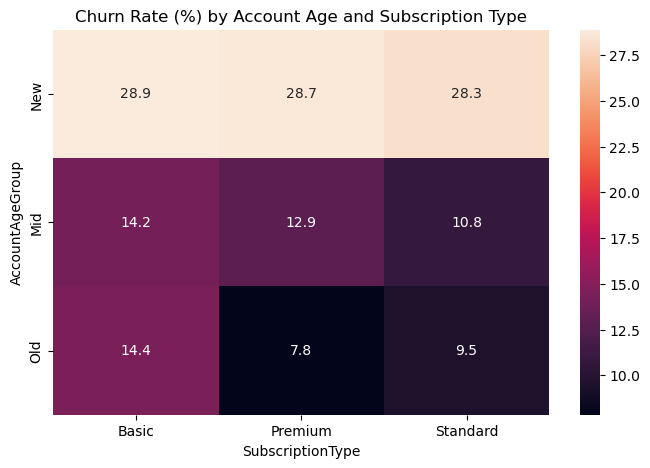

In [22]:
pivot_2 = interaction_2.pivot(
    index='AccountAgeGroup',
    columns='SubscriptionType',
    values='churn_rate_percent'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_2, annot=True, fmt=".1f")
plt.title('Churn Rate (%) by Account Age and Subscription Type')
plt.show()


In [23]:
df['SupportLevel'] = pd.cut(
    df['SupportTicketsPerMonth'],
    bins=[-1, 0, 2, df['SupportTicketsPerMonth'].max()],
    labels=['None', 'Low', 'High']
)


In [24]:
interaction_3 = (
    df.groupby(['SupportLevel', 'PaymentMethod'])['Churn']
    .mean()
    .reset_index()
)

interaction_3['churn_rate_percent'] = interaction_3['Churn'] * 100
interaction_3


C:\Users\pavithra sekar\AppData\Local\Temp\ipykernel_8016\1145206513.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['SupportLevel', 'PaymentMethod'])['Churn']


,SupportLevel,PaymentMethod,Churn,churn_rate_percent
0,None,Bank transfer,0.192308,19.230769
1,None,Credit card,0.105263,10.526316
2,None,Electronic check,0.090909,9.090909
3,None,Mailed check,0.250000,25.000000
4,Low,Bank transfer,0.104167,10.416667
5,Low,Credit card,0.105263,10.526316
6,Low,Electronic check,0.155556,15.555556
7,Low,Mailed check,0.153846,15.384615
8,High,Bank transfer,0.185714,18.571429
9,High,Credit card,0.171598,17.159763


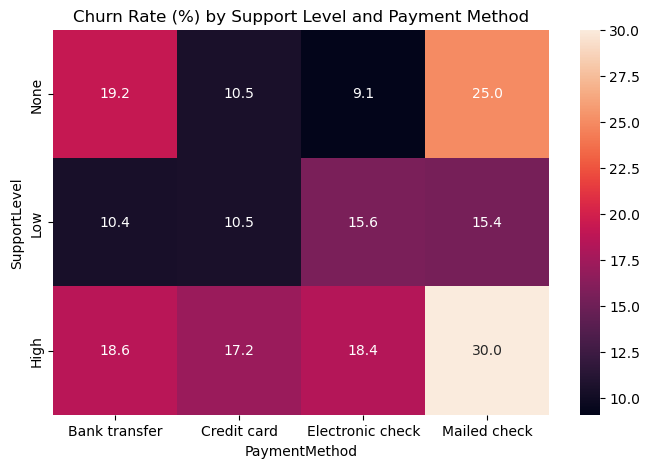

In [25]:
pivot_3 = interaction_3.pivot(
    index='SupportLevel',
    columns='PaymentMethod',
    values='churn_rate_percent'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_3, annot=True, fmt=".1f")
plt.title('Churn Rate (%) by Support Level and Payment Method')
plt.show()


In [26]:
engagement_features = [
    'ViewingHoursPerWeek',
    'WatchlistSize',
    'ContentDownloadsPerMonth'
]

scaler = MinMaxScaler()
df[engagement_features] = scaler.fit_transform(df[engagement_features])

df['EngagementScore'] = df[engagement_features].mean(axis=1)
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,LowViewing,ViewingLevel,AccountAgeGroup,SupportLevel,EngagementScore
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.001805,...,0.625000,No,No,LOHRYYC9E8,0,True,Low,Mid,High,0.379003
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,0.928695,...,0.333333,No,NaN,RIH7RFEZCS,0,False,High,Old,High,0.563533
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,0.767064,...,0.583333,No,Yes,JB5J8X2UY1,1,False,High,New,High,0.647411
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,0.055005,...,0.500000,No,NaN,Z4GZJIB90P,0,True,Low,Mid,High,0.491124
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,0.999693,...,0.750000,No,NaN,B3BDJTW0L9,0,False,High,New,High,0.882551


In [27]:
df['TenureGroup'] = pd.qcut(
    df['AccountAge'],
    q=3,
    labels=['New', 'Mid', 'Loyal']
)
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ParentalControl,SubtitlesEnabled,CustomerID,Churn,LowViewing,ViewingLevel,AccountAgeGroup,SupportLevel,EngagementScore,TenureGroup
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.001805,...,No,No,LOHRYYC9E8,0,True,Low,Mid,High,0.379003,Mid
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,0.928695,...,No,NaN,RIH7RFEZCS,0,False,High,Old,High,0.563533,Loyal
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,0.767064,...,No,Yes,JB5J8X2UY1,1,False,High,New,High,0.647411,New
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,0.055005,...,No,NaN,Z4GZJIB90P,0,True,Low,Mid,High,0.491124,Mid
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,0.999693,...,No,NaN,B3BDJTW0L9,0,False,High,New,High,0.882551,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,83,5.157131,428.041874,Basic,NaN,No,Movies,No,Mobile,0.055642,...,Yes,NaN,AV3ZDGUB4C,0,True,Low,Old,High,0.582323,Loyal
959,67,13.149346,881.006183,Basic,NaN,Yes,TV Shows,No,Computer,0.086341,...,No,NaN,15GWB8NVG5,0,True,Low,Mid,Low,0.606445,Mid
960,119,8.575780,1020.517781,Basic,Bank transfer,Yes,TV Shows,Yes,TV,0.135655,...,No,NaN,6VUYH24HVW,0,True,Low,Old,Low,0.398676,Loyal
961,57,15.908851,NaN,Basic,NaN,Yes,Movies,No,Mobile,0.755733,...,No,NaN,X1OE7MMFDL,0,False,High,Mid,None,0.718464,Mid


In [28]:
df['HighValueCustomer'] = (
    (df['AccountAge'] > df['AccountAge'].median()) &
    (df['TotalCharges'] > df['TotalCharges'].median())
).astype(int)


In [29]:
df['LowEngagementFlag'] = (
    df['EngagementScore'] < df['EngagementScore'].quantile(0.25)
).astype(int)


In [30]:
df['MonthlyChargeToTenure'] = df['MonthlyCharges'] / (df['AccountAge'] + 1)


In [31]:
df['HighMonthlyChargeFlag'] = (
    df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)
).astype(int)


In [32]:
df['SupportIntensity'] = df['SupportTicketsPerMonth'] / (df['AccountAge'] + 1)


In [33]:
df['FrequentSupportFlag'] = (
    df['SupportTicketsPerMonth'] > df['SupportTicketsPerMonth'].quantile(0.75)
).astype(int)


In [34]:
df['LowEngagement_MonthlySub'] = (
    (df['LowEngagementFlag'] == 1) &
    (df['SubscriptionType'] == 'Month-to-month')
).astype(int)


In [35]:
df['HighSupport_ManualPayment'] = (
    (df['FrequentSupportFlag'] == 1) &
    (df['PaymentMethod'] == 'Manual')
).astype(int)


In [36]:
binary_cols = [
    'PaperlessBilling',
    'MultiDeviceAccess',
    'ParentalControl',
    'SubtitlesEnabled'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [37]:
df = df.drop(columns=['CustomerID'])


In [38]:
df.head()
df.isnull().sum()


AccountAge                     0
MonthlyCharges               204
TotalCharges                 186
SubscriptionType              50
PaymentMethod                223
PaperlessBilling               0
ContentType                    0
MultiDeviceAccess              0
DeviceRegistered              76
ViewingHoursPerWeek            0
AverageViewingDuration         0
ContentDownloadsPerMonth       0
GenrePreference              110
UserRating                   261
SupportTicketsPerMonth         0
Gender                        40
WatchlistSize                  0
ParentalControl                0
SubtitlesEnabled             800
Churn                          0
LowViewing                     0
ViewingLevel                   0
AccountAgeGroup                0
SupportLevel                   0
EngagementScore                0
TenureGroup                    0
HighValueCustomer              0
LowEngagementFlag              0
MonthlyChargeToTenure        204
HighMonthlyChargeFlag          0
SupportInt

In [39]:
X = df.drop(columns=['Churn'])
y = df['Churn']


In [40]:
X = pd.get_dummies(X, drop_first=True)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,)


In [42]:
X_train.isnull().sum().sort_values(ascending=False).head(10)


SubtitlesEnabled           640
UserRating                 207
TotalCharges               153
MonthlyCharges             150
MonthlyChargeToTenure      150
GenrePreference_Fantasy      0
ContentType_Movies           0
ContentType_TV Shows         0
DeviceRegistered_Mobile      0
DeviceRegistered_TV          0
dtype: int64

In [43]:
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [44]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [45]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [46]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]


In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
[[104  51]
 [ 18  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       155
           1       0.28      0.53      0.37        38

    accuracy                           0.64       193
   macro avg       0.57      0.60      0.56       193
weighted avg       0.74      0.64      0.68       193


ROC-AUC Score:
0.6531409168081495


In [48]:
custom_threshold = 0.4
y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

print("Confusion Matrix (Threshold = 0.4):")
print(confusion_matrix(y_test, y_pred_custom))


Confusion Matrix (Threshold = 0.4):
[[91 64]
 [17 21]]


In [49]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
20,FrequentSupportFlag,0.439991
43,SupportLevel_High,0.373505
1,MonthlyCharges,0.289798
10,WatchlistSize,0.268768
28,ContentType_Movies,0.248651
27,PaymentMethod_Mailed check,0.191824
29,ContentType_TV Shows,0.150242
42,SupportLevel_Low,0.136103
17,MonthlyChargeToTenure,0.121774
3,PaperlessBilling,0.080950


In [50]:
X_train_rf = X_train_imputed
X_test_rf = X_test_imputed


In [51]:
rf_model = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42,n_jobs=-1)

rf_model.fit(X_train_rf, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]


In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_rf))

Confusion Matrix:
[[139  16]
 [ 28  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       155
           1       0.38      0.26      0.31        38

    accuracy                           0.77       193
   macro avg       0.61      0.58      0.59       193
weighted avg       0.74      0.77      0.75       193


ROC-AUC Score:
0.669949066213922


In [54]:
custom_threshold = 0.35
y_pred_rf_custom = (y_pred_proba_rf >= custom_threshold).astype(int)

print("Confusion Matrix (Threshold = 0.35):")
print(confusion_matrix(y_test, y_pred_rf_custom))


Confusion Matrix (Threshold = 0.35):
[[119  36]
 [ 20  18]]


In [55]:
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_rf.head(10)

,Feature,Importance
17,MonthlyChargeToTenure,0.091135
0,AccountAge,0.085208
6,AverageViewingDuration,0.080898
19,SupportIntensity,0.078835
5,ViewingHoursPerWeek,0.071123
14,EngagementScore,0.068195
2,TotalCharges,0.063554
1,MonthlyCharges,0.056647
7,ContentDownloadsPerMonth,0.055104
10,WatchlistSize,0.043452


In [56]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [ ]:
shap_values = explainer(X_test_imputed_df)


In [ ]:
X_train_imputed_df = pd.DataFrame(
    X_train_imputed,
    columns=X_train.columns,
    index=X_train.index
)


In [ ]:
X_test_imputed_df = pd.DataFrame(
    X_test_imputed,
    columns=X_test.columns,
    index=X_test.index
)


In [ ]:
shap_values = explainer.shap_values(X_test_imputed_df)

In [ ]:
shap.summary_plot(
    shap_values,
    X_test_imputed_df,
    plot_type="bar"
)


In [ ]:
idx = np.where(y_test == 1)[0][0]


In [ ]:
idx = np.where(y_test == 1)[0][0]

In [ ]:
shap.plots.waterfall(shap_values[idx, :, 1])

In [ ]:
df_test = X_test.copy()
df_test['ActualChurn'] = y_test.values
df_test['ChurnProbability'] = y_pred_proba_rf


In [ ]:
def risk_bucket(prob):
    if prob >= 0.6:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df_test['ChurnRiskSegment'] = df_test['ChurnProbability'].apply(risk_bucket)


In [ ]:
df_test['ChurnRiskSegment'].value_counts(normalize=True)


In [ ]:
churn_by_segment = (
    df_test
    .groupby('ChurnRiskSegment')['ActualChurn']
    .mean()
    .sort_values(ascending=False)
)

churn_by_segment


In [ ]:
avg_monthly_revenue = df['MonthlyCharges'].mean()
avg_monthly_revenue


In [ ]:
high_risk_customers = df_test[df_test['ChurnRiskSegment'] == 'High Risk']


In [ ]:
expected_churn_loss = (
    high_risk_customers['ChurnProbability'].sum()
    * avg_monthly_revenue
)

expected_churn_loss


In [ ]:
retention_success_rate = 0.20

retained_revenue = expected_churn_loss * retention_success_rate
retained_revenue


In [ ]:
key_features = [
    'EngagementScore',
    'SupportIntensity',
    'MonthlyCharges'
]

df_test[key_features + ['ChurnRiskSegment']].groupby(
    'ChurnRiskSegment'
).mean()


In [ ]:
summary_table = (
    df_test
    .groupby('ChurnRiskSegment')
    .agg(
        Customers=('ChurnProbability', 'count'),
        Avg_Churn_Prob=('ChurnProbability', 'mean'),
        Actual_Churn_Rate=('ActualChurn', 'mean')
    )
)

summary_table


In [ ]:
joblib.dump(explainer, "explainer.pkl")
joblib.dump(imputer, "imputer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(log_model, "log_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")

In [ ]:
feature_columns = X_train.columns
joblib.dump(feature_columns, "feature_columns.pkl")
